In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('weatherAUS.csv')
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [3]:
df.shape

(145460, 23)

In [4]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [5]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [6]:
for column in df.columns:
    print(column,':',round(df[column].isnull().sum()/df.shape[0] * 100, ndigits=2),'% of missing values')

Date : 0.0 % of missing values
Location : 0.0 % of missing values
MinTemp : 1.02 % of missing values
MaxTemp : 0.87 % of missing values
Rainfall : 2.24 % of missing values
Evaporation : 43.17 % of missing values
Sunshine : 48.01 % of missing values
WindGustDir : 7.1 % of missing values
WindGustSpeed : 7.06 % of missing values
WindDir9am : 7.26 % of missing values
WindDir3pm : 2.91 % of missing values
WindSpeed9am : 1.21 % of missing values
WindSpeed3pm : 2.11 % of missing values
Humidity9am : 1.82 % of missing values
Humidity3pm : 3.1 % of missing values
Pressure9am : 10.36 % of missing values
Pressure3pm : 10.33 % of missing values
Cloud9am : 38.42 % of missing values
Cloud3pm : 40.81 % of missing values
Temp9am : 1.21 % of missing values
Temp3pm : 2.48 % of missing values
RainToday : 2.24 % of missing values
RainTomorrow : 2.25 % of missing values


- There are few features absorbed which has null values which are closer are higher than 40 precentage
- Removing the null values from the target variable('RainTomorrow') since every less percent records are only missing from the dataset.

In [7]:
df.dropna(subset = ['RainTomorrow'],axis=0,inplace=True)

In [8]:
for col in df.columns:
    print(col,':',df[col].nunique())

Date : 3436
Location : 49
MinTemp : 389
MaxTemp : 505
Rainfall : 679
Evaporation : 356
Sunshine : 145
WindGustDir : 16
WindGustSpeed : 67
WindDir9am : 16
WindDir3pm : 16
WindSpeed9am : 43
WindSpeed3pm : 44
Humidity9am : 101
Humidity3pm : 101
Pressure9am : 546
Pressure3pm : 549
Cloud9am : 10
Cloud3pm : 10
Temp9am : 440
Temp3pm : 500
RainToday : 2
RainTomorrow : 2


In [9]:
categorical_features = [feature for feature in df.columns if df[feature].nunique() < 20]
categorical_features

['WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'Cloud9am',
 'Cloud3pm',
 'RainToday',
 'RainTomorrow']

features which consits of less than 20 unique characters are considred as categorical features

In [10]:
numerical_features = [feature for feature in df.columns if df[feature].nunique() > 20]
numerical_features

['Date',
 'Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

features which consits of more than 20 unique characters are considred as Numerical features

In [11]:
features_with_na = [feature for feature in df.columns if df[feature].isnull().sum()>1]

features_with_na

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday']

In [12]:
df.describe().T

count         mean        std    min     25%     50%  \
MinTemp        141556.0    12.186400   6.403283   -8.5     7.6    12.0   
MaxTemp        141871.0    23.226784   7.117618   -4.8    17.9    22.6   
Rainfall       140787.0     2.349974   8.465173    0.0     0.0     0.0   
Evaporation     81350.0     5.469824   4.188537    0.0     2.6     4.8   
Sunshine        74377.0     7.624853   3.781525    0.0     4.9     8.5   
WindGustSpeed  132923.0    39.984292  13.588801    6.0    31.0    39.0   
WindSpeed9am   140845.0    14.001988   8.893337    0.0     7.0    13.0   
WindSpeed3pm   139563.0    18.637576   8.803345    0.0    13.0    19.0   
Humidity9am    140419.0    68.843810  19.051293    0.0    57.0    70.0   
Humidity3pm    138583.0    51.482606  20.797772    0.0    37.0    52.0   
Pressure9am    128179.0  1017.653758   7.105476  980.5  1012.9  1017.6   
Pressure3pm    128212.0  1015.258204   7.036677  977.1  1010.4  1015.2   
Cloud9am        88536.0     4.437189   2.887016    0.0     1.0     5.0   
Cloud3pm        85099.0     4.503167   2.720633    0.0     2.0     5.0   
Temp9am        141289.0    16.987509   6.492838   -7.2    12.3    16.7   
Temp3pm        139467.0    21.687235   6.937594   -5.4    16.6    21.1   

                  75%     max  
MinTemp          16.8    33.9  
MaxTemp          28.2    48.1  
Rainfall          0.8   371.0  
Evaporation       7.4   145.0  
Sunshine         10.6    14.5  
WindGustSpeed    48.0   135.0  
WindSpeed9am     19.0   130.0  
WindSpeed3pm     24.0    87.0  
Humidity9am      83.0   100.0  
Humidity3pm      66.0   100.0  
Pressure9am    1022.4  1041.0  
Pressure3pm    1020.0  1039.6  
Cloud9am          7.0     9.0  
Cloud3pm          7.0     9.0  
Temp9am          21.6    40.2  
Temp3pm          26.4    46.7

There is a huge difference from the minimum and the maximum value for few of the features.

In [13]:
df[(df['MinTemp'] < 0) & (df['RainToday'] == 'Yes')].head()


Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
250   2009-08-08   Albury     -0.8     12.9       4.2          NaN       NaN   
624   2010-08-17   Albury     -1.0     12.1       3.8          NaN       NaN   
925   2011-07-14   Albury     -0.3     12.6       4.0          NaN       NaN   
1981  2014-08-02   Albury     -1.1     11.5       2.2          NaN       NaN   
2348  2015-08-04   Albury     -2.4      8.6       1.4          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
250          WNW           24.0          E  ...        78.0         50.0   
624            E           15.0        NaN  ...        87.0         55.0   
925           SW           15.0          S  ...        99.0         65.0   
1981           W           24.0          E  ...        89.0         56.0   
2348           W           30.0        ENE  ...        85.0         55.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
250        1026.4       1023.0       NaN       NaN      4.4     12.3   
624        1024.1       1020.4       NaN       1.0      4.5     11.3   
925        1029.3       1029.7       8.0       NaN      4.0     10.7   
1981       1029.1       1029.7       NaN       NaN      3.2     11.2   
2348       1025.1       1021.9       NaN       8.0      2.5      7.7   

      RainToday  RainTomorrow  
250         Yes            No  
624         Yes            No  
925         Yes            No  
1981        Yes            No  
2348        Yes           Yes  

[5 rows x 23 columns]

Even with the negative temperature it is recorded as rainy on that current day

In [14]:
print(df['WindSpeed9am'].mean())
print(df['WindSpeed3pm'].mean())


14.001988000994
18.63757586179718


The windspeed at evening is higher than morning but not with huge difference

In [15]:
df[(df['RainToday'] == 'Yes') & (df['RainTomorrow'] == 'Yes')].shape

(14597, 23)

In [16]:
df[(df['RainToday'] == 'No') & (df['RainTomorrow'] == 'Yes')].shape

(16604, 23)

In [17]:
df[(df['RainToday'] == 'No') & (df['RainTomorrow'] == 'No')].shape

(92728, 23)

In [18]:
df[(df['RainToday'] == 'Yes') & (df['RainTomorrow'] == 'No')].shape

(16858, 23)

In most cases if today was a non-rainy day then tommorow is also non-rainy day.

In [19]:
print('Rain Today')
temp = df[df['RainToday'] == 'Yes']
print('Minimum clouds during rainy day at morning :',temp.Cloud9am.min())
print('Maximum clouds during rainy day at morning :',temp.Cloud9am.max())
print('Average clouds during rainy day at morning :',temp.Cloud9am.mean())

print('\n')

print('Rain Tomorrow')
temp = df[df['RainTomorrow'] == 'Yes']
print('Minimum clouds on Tomorrow rainy day at morning :',temp.Cloud9am.min())
print('Maximum clouds on Tomorrow rainy day at morning :',temp.Cloud9am.max())
print('Average clouds on Tomorrow rainy day at morning :',temp.Cloud9am.mean())

Rain Today
Minimum clouds during rainy day at morning : 0.0
Maximum clouds during rainy day at morning : 9.0
Average clouds during rainy day at morning : 6.018474088291747


Rain Tomorrow
Minimum clouds on Tomorrow rainy day at morning : 0.0
Maximum clouds on Tomorrow rainy day at morning : 8.0
Average clouds on Tomorrow rainy day at morning : 6.09999030161963


In [20]:
print('Rain Today')
temp = df[df['RainToday'] == 'No']
print('Minimum clouds during non-rainy day at morning :',temp.Cloud9am.min())
print('Maximum clouds during non-rainy day at morning :',temp.Cloud9am.max())
print('Average clouds during non-rainy day at morning :',temp.Cloud9am.mean())

print('\n')

print('Rain Tomorrow')
temp = df[df['RainTomorrow'] == 'No']
print('Minimum clouds on Tomorrow non-rainy day at morning :',temp.Cloud9am.min())
print('Maximum clouds on Tomorrow non-rainy day at morning :',temp.Cloud9am.max())
print('Average clouds on Tomorrow non-rainy day at morning :',temp.Cloud9am.mean())

Rain Today
Minimum clouds during non-rainy day at morning : 0.0
Maximum clouds during non-rainy day at morning : 9.0
Average clouds during non-rainy day at morning : 3.939796797480764


Rain Tomorrow
Minimum clouds on Tomorrow non-rainy day at morning : 0.0
Maximum clouds on Tomorrow non-rainy day at morning : 9.0
Average clouds on Tomorrow non-rainy day at morning : 3.9322820037105752


In [21]:
print('Rain Today')
temp = df[df['RainToday'] == 'Yes']
print('Minimum clouds during rainy day at evening :',temp.Cloud3pm.min())
print('Maximum clouds during rainy day at evening :',temp.Cloud3pm.max())
print('Average clouds during rainy day at evening :',temp.Cloud3pm.mean())

print('\n')

print('Rain Tomorrow')
temp = df[df['RainTomorrow'] == 'Yes']
print('Minimum clouds on Tomorrow rainy day at evening :',temp.Cloud3pm.min())
print('Maximum clouds on Tomorrow rainy day at evening :',temp.Cloud3pm.max())
print('Average clouds on Tomorrow rainy day at evening :',temp.Cloud3pm.mean())

Rain Today
Minimum clouds during rainy day at evening : 0.0
Maximum clouds during rainy day at evening : 8.0
Average clouds during rainy day at evening : 5.8270744098017735


Rain Tomorrow
Minimum clouds on Tomorrow rainy day at evening : 0.0
Maximum clouds on Tomorrow rainy day at evening : 8.0
Average clouds on Tomorrow rainy day at evening : 6.360065063091483


In [22]:
print('Rain Today')
temp = df[df['RainToday'] == 'No']
print('Minimum clouds during non-rainy day at evening :',temp.Cloud3pm.min())
print('Maximum clouds during non-rainy day at evening :',temp.Cloud3pm.max())
print('Average clouds during non-rainy day at evening :',temp.Cloud3pm.mean())

print('\n')

print('Rain Tomorrow')
temp = df[df['RainTomorrow'] == 'No']
print('Minimum clouds on Tomorrow non-rainy day at evening :',temp.Cloud3pm.min())
print('Maximum clouds on Tomorrow non-rainy day at evening :',temp.Cloud3pm.max())
print('Average clouds on Tomorrow non-rainy day at evening :',temp.Cloud3pm.mean())

Rain Today
Minimum clouds during non-rainy day at evening : 0.0
Maximum clouds during non-rainy day at evening : 9.0
Average clouds during non-rainy day at evening : 4.086651706260156


Rain Tomorrow
Minimum clouds on Tomorrow non-rainy day at evening : 0.0
Maximum clouds on Tomorrow non-rainy day at evening : 9.0
Average clouds on Tomorrow non-rainy day at evening : 3.921895974448782


The Clouds didn't differ much during morning or at evening even if its rainy or non-rainy day with comparison of today and Tomorrow

In [23]:
# RainTomorrow = np.where(df['RainTomorrow'] == 'Yes',1,0)

In [24]:
# temp = df[['Date','RainTomorrow']]
# temp['RainTomorrow'] = RainTomorrow
# temp

In [25]:
# mask = temp[temp.stack().str.contains('2008').any(level=0)]
# mask.set_index('Date', inplace=True)
# mask.index = pd.to_datetime(mask.index)
# mask = mask.resample('1M').sum()
# mask

In [26]:
# # sns.barplot(x=mask.index,y='RainTomorrow',data=mask)
# fig = px.bar(mask, x=mask.index, y='RainTomorrow')
# fig.show()

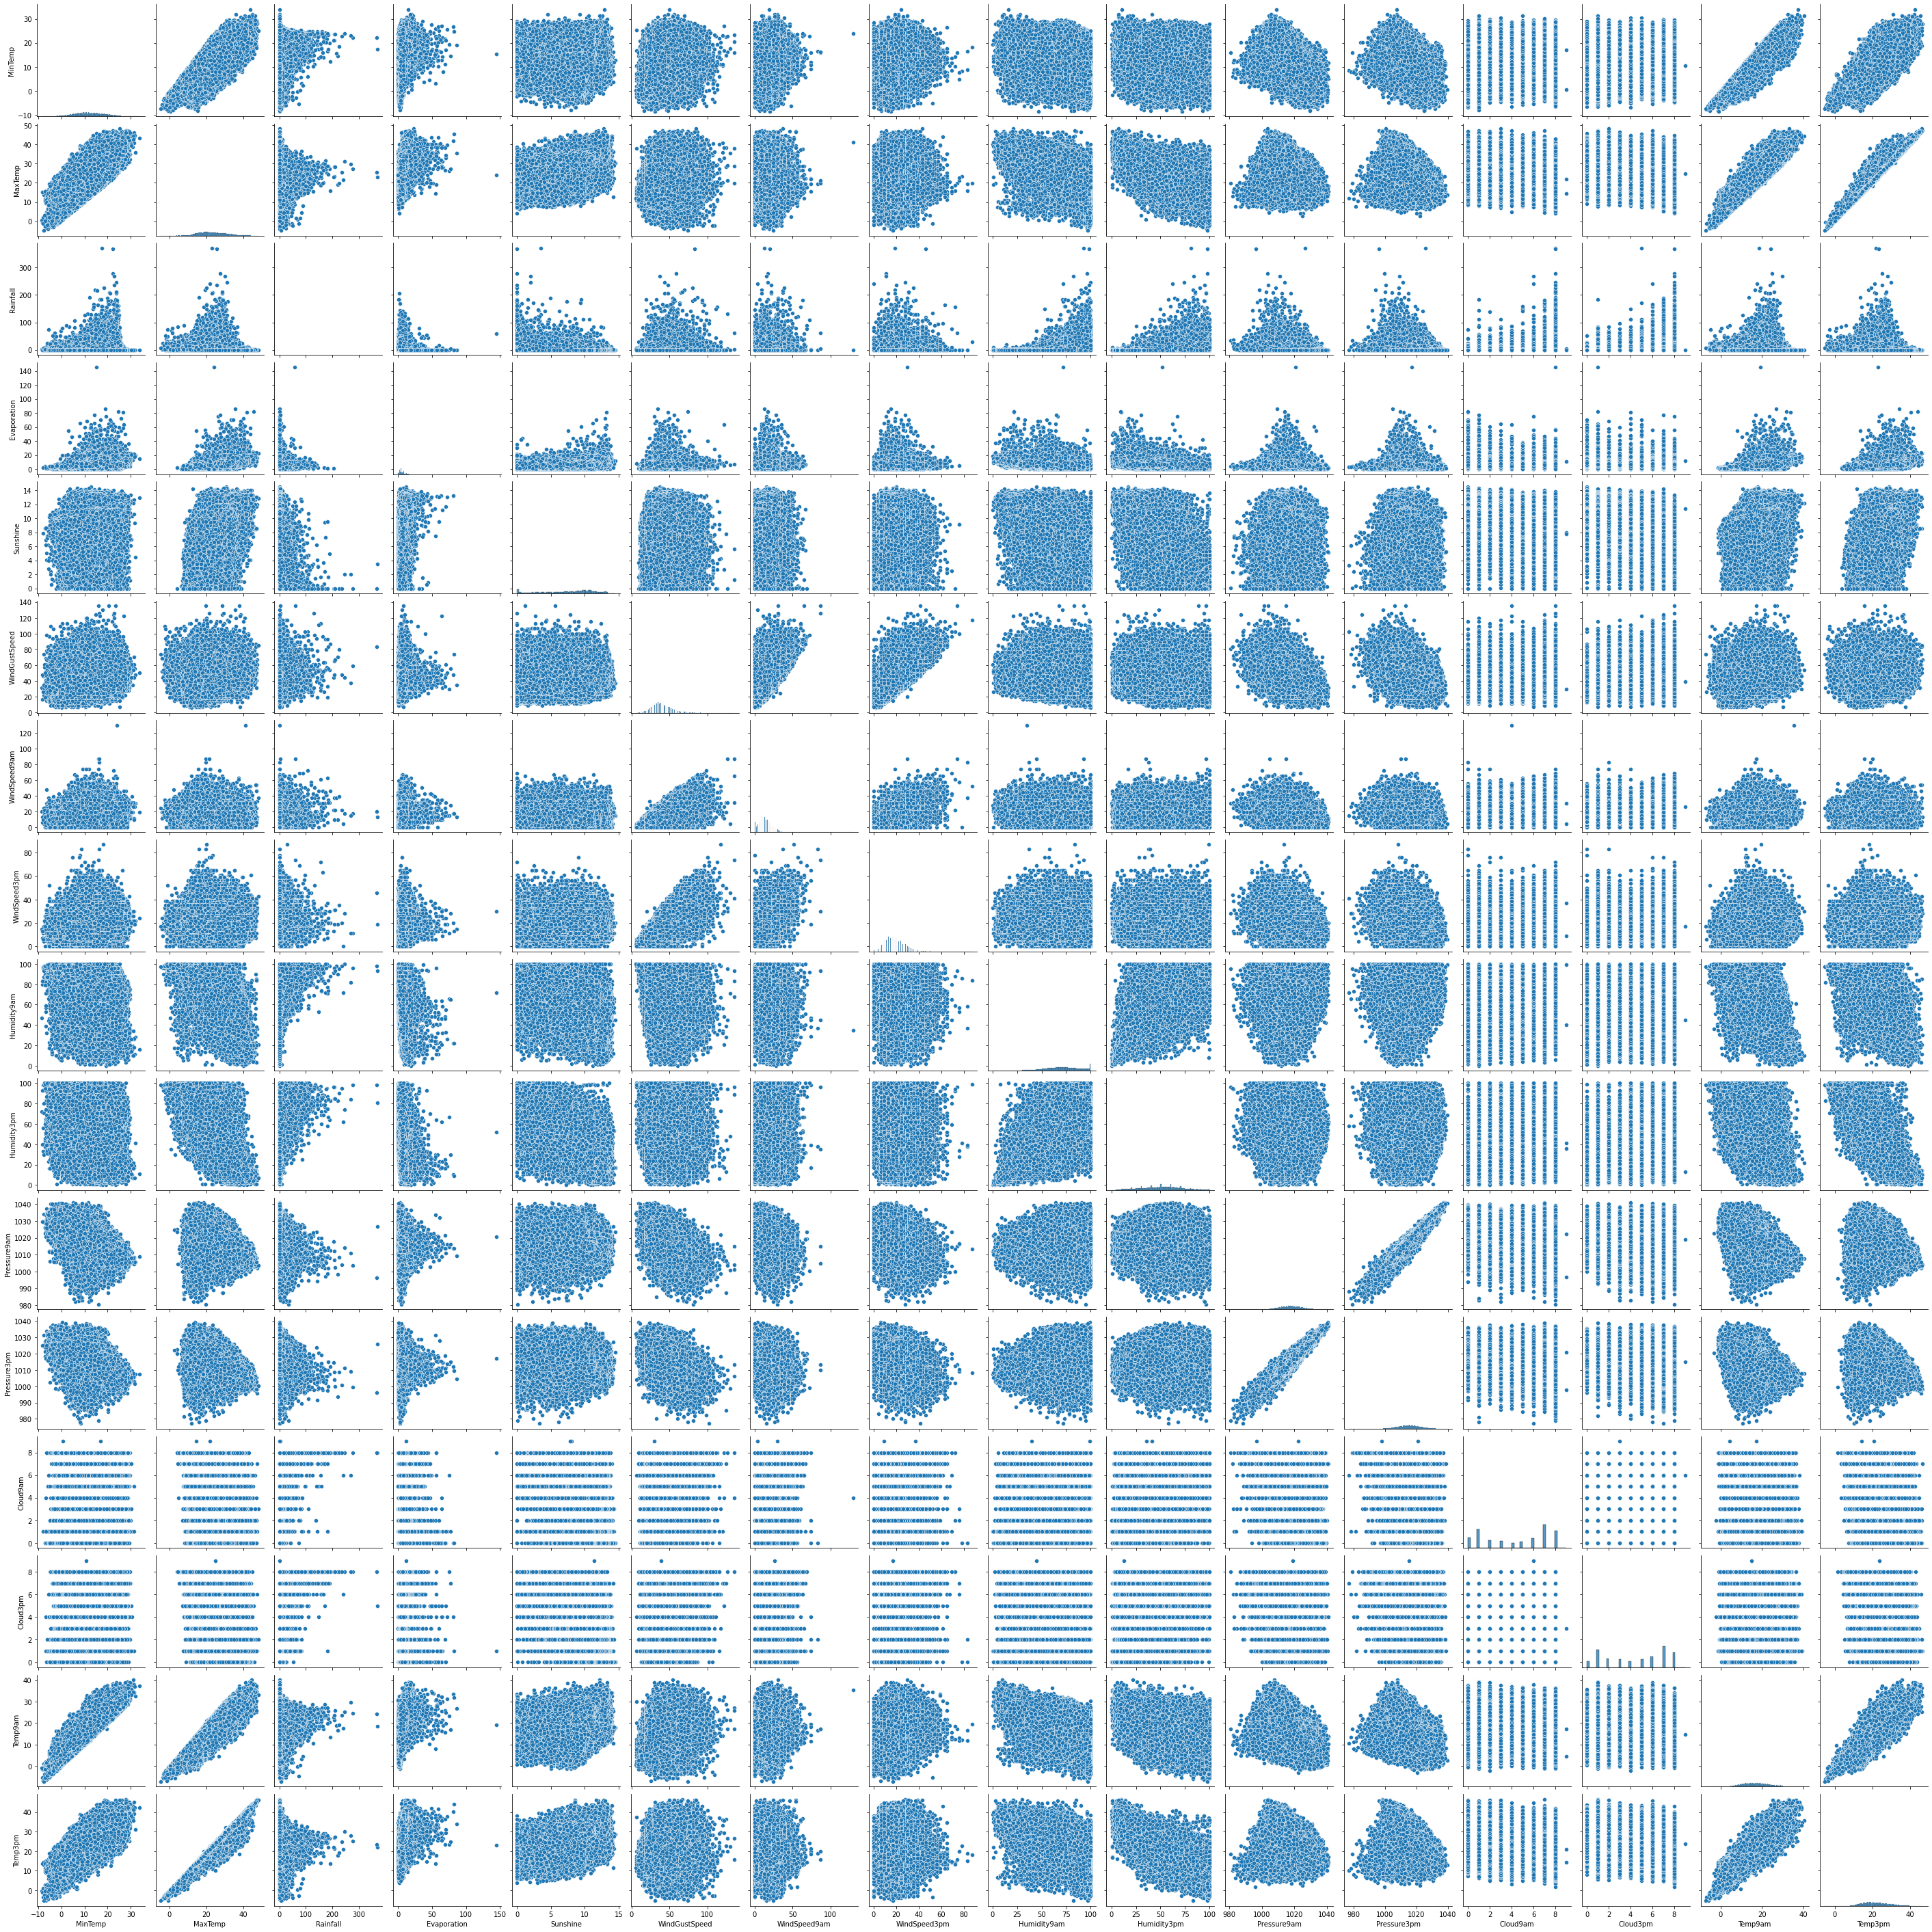

In [27]:
#Pair plot
sns.pairplot(df)

In [28]:
#Pair plot
# sns.pairplot(df,hue = 'Location')

<AxesSubplot:>

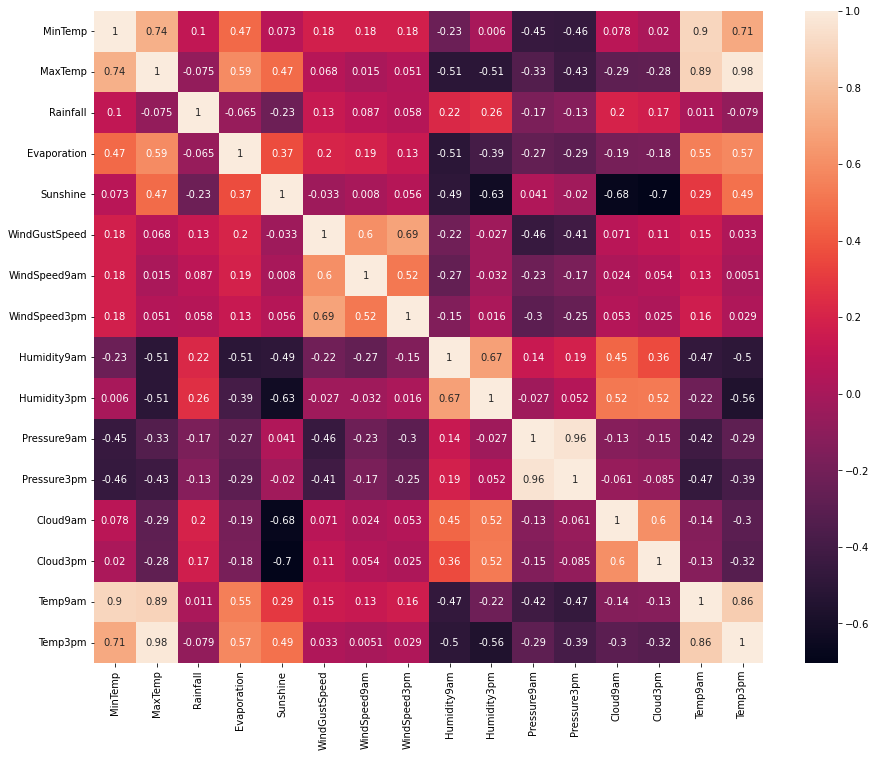

In [34]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True)